# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8')

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')


In [5]:
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.0
1,user_1,62,28.0,0.0
2,user_1,62,28.0,0.0
3,user_1,62,28.0,0.0
4,user_1,62,28.0,0.0


In [3]:
df.fillna(0, inplace=True)

In [6]:
X = df.drop(['AVG(diff)', 'uid'], axis=1)
y = df['AVG(diff)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")
print("Features used:", list(X.columns))
df.head()

Train Shape: (61, 2)
Test Shape: (16, 2)
Features used: ['num_commits', 'pageviews']


,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.0
1,user_1,62,28.0,0.0
2,user_1,62,28.0,0.0
3,user_1,62,28.0,0.0
4,user_1,62,28.0,0.0


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [9]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    
    test_scores = []
    
    X_arr = np.array(X)
    y_arr = np.array(y)
    
    print(f"Running Cross-Validation for {model.__class__.__name__}...")
    
    for train_index, val_index in kf.split(X_arr):
        X_fold_train, X_fold_val = X_arr[train_index], X_arr[val_index]
        y_fold_train, y_fold_val = y_arr[train_index], y_arr[val_index]
        
        model.fit(X_fold_train, y_fold_train)
        
        pred_train = model.predict(X_fold_train)
        pred_val = model.predict(X_fold_val)
        
        rmse_train = np.sqrt(mean_squared_error(y_fold_train, pred_train))
        rmse_val = np.sqrt(mean_squared_error(y_fold_val, pred_val))
        
        print(f"train -  {rmse_train:.5f}   |   test -  {rmse_val:.5f}")
        
        test_scores.append(rmse_val)
        
    print(f"Average RMSE on crossval is {np.mean(test_scores):.5f}\n")

In [10]:
lin_reg = LinearRegression()
crossval(10, X_train, y_train, lin_reg)

Running Cross-Validation for LinearRegression...
train -  43.85194   |   test -  42.01529
train -  41.80102   |   test -  58.19070
train -  44.69554   |   test -  34.89272
train -  38.84550   |   test -  76.60150
train -  44.86080   |   test -  31.90431
train -  44.85503   |   test -  30.36902
train -  42.07183   |   test -  56.10331
train -  45.67552   |   test -  16.54400
train -  43.60671   |   test -  45.85548
train -  44.26702   |   test -  39.06887
Average RMSE on crossval is 43.15452



In [11]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=21)
crossval(10, X_train, y_train, tree_reg)

Running Cross-Validation for DecisionTreeRegressor...
train -  15.95154   |   test -  36.99012
train -  12.05122   |   test -  38.58967
train -  12.92158   |   test -  33.47636
train -  0.00000   |   test -  60.36468
train -  12.95861   |   test -  21.28334
train -  14.17285   |   test -  23.43345
train -  16.65806   |   test -  36.60841
train -  9.61025   |   test -  71.57333
train -  9.30416   |   test -  60.09094
train -  13.67659   |   test -  46.33618
Average RMSE on crossval is 42.87465



In [12]:
rf_reg = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=21)
crossval(10, X_train, y_train, rf_reg)

Running Cross-Validation for RandomForestRegressor...
train -  14.79264   |   test -  26.56334
train -  13.21186   |   test -  41.64731
train -  13.20653   |   test -  38.39085
train -  12.62671   |   test -  57.67087
train -  14.39810   |   test -  22.29036
train -  14.44996   |   test -  5.86979
train -  14.00024   |   test -  27.25848
train -  12.25354   |   test -  57.34752
train -  14.66500   |   test -  40.07244
train -  14.13528   |   test -  32.13077
Average RMSE on crossval is 34.92417



## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [13]:
def plot_results(model, X_test, y_test, title):
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{title} Test RMSE: {rmse:.2f}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.6, color='blue')
    
    plt.title(f"{title} (RMSE: {rmse:.2f})")
    plt.xlabel("Actual Delta")
    plt.ylabel("Predicted Delta")
    plt.show()

Linear Regression Test RMSE: 54.11


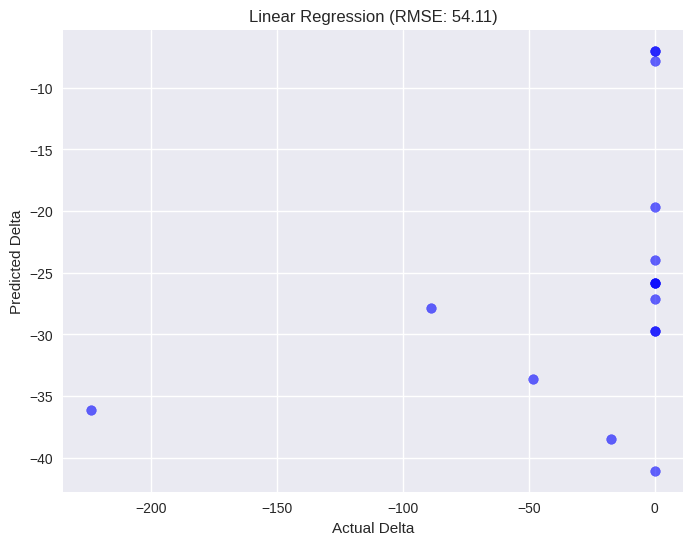

In [14]:
lin_reg.fit(X_train, y_train)
plot_results(lin_reg, X_test, y_test, "Linear Regression")

Decision Tree Test RMSE: 49.57


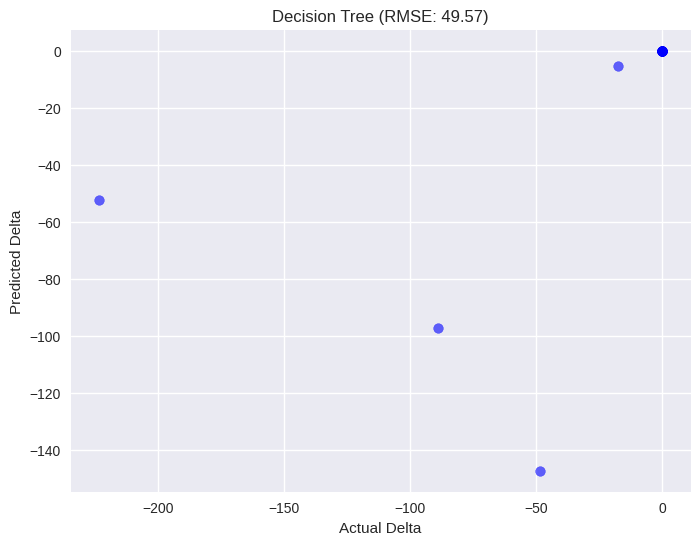

In [15]:
tree_reg.fit(X_train, y_train)
plot_results(tree_reg, X_test, y_test, "Decision Tree")

Random Forest Test RMSE: 40.96


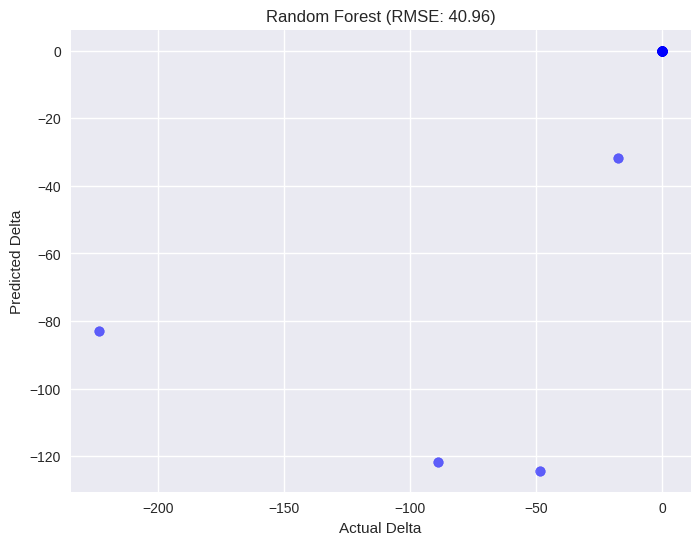

In [16]:
rf_reg.fit(X_train, y_train)
plot_results(rf_reg, X_test, y_test, "Random Forest")

In the ideal case (a model with 0 error), the plot would look like a **perfect diagonal straight line** extending from the bottom-left to the top-right.

This is because every Predicted Value ($y$) would be exactly equal to the Actual Value ($x$), satisfying the equation $y = x$. All the dots would sit perfectly on this 45-degree line.